In [9]:
import re
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# My Solution to Exercise 1

In [2]:
%%file graph.txt
node0, node1 0.04, node8 11.11, node14 72.21
node1, node46 1247.25, node6 20.59, node13 64.94
node2, node66 54.18, node31 166.80, node45 1561.45
node3, node20 133.65, node6 2.06, node11 42.43
node4, node75 3706.67, node5 0.73, node7 1.02
node5, node45 1382.97, node7 3.33, node11 34.54
node6, node31 63.17, node9 0.72, node10 13.10
node7, node50 478.14, node9 3.15, node10 5.85
node8, node69 577.91, node11 7.45, node12 3.18
node9, node70 2454.28, node13 4.42, node20 16.53
node10, node89 5352.79, node12 1.87, node16 25.16
node11, node94 4961.32, node18 37.55, node20 65.08
node12, node84 3914.62, node24 34.32, node28 170.04
node13, node60 2135.95, node38 236.33, node40 475.33
node14, node67 1878.96, node16 2.70, node24 38.65
node15, node91 3597.11, node17 1.01, node18 2.57
node16, node36 392.92, node19 3.49, node38 278.71
node17, node76 783.29, node22 24.78, node23 26.45
node18, node91 3363.17, node23 16.23, node28 55.84
node19, node26 20.09, node20 0.24, node28 70.54
node20, node98 3523.33, node24 9.81, node33 145.80
node21, node56 626.04, node28 36.65, node31 27.06
node22, node72 1447.22, node39 136.32, node40 124.22
node23, node52 336.73, node26 2.66, node33 22.37
node24, node66 875.19, node26 1.80, node28 14.25
node25, node70 1343.63, node32 36.58, node35 45.55
node26, node47 135.78, node27 0.01, node42 122.00
node27, node65 480.55, node35 48.10, node43 246.24
node28, node82 2538.18, node34 21.79, node36 15.52
node29, node64 635.52, node32 4.22, node33 12.61
node30, node98 2616.03, node33 5.61, node35 13.95
node31, node98 3350.98, node36 20.44, node44 125.88
node32, node97 2613.92, node34 3.33, node35 1.46
node33, node81 1854.73, node41 3.23, node47 111.54
node34, node73 1075.38, node42 51.52, node48 129.45
node35, node52 17.57, node41 2.09, node50 78.81
node36, node71 1171.60, node54 101.08, node57 260.46
node37, node75 269.97, node38 0.36, node46 80.49
node38, node93 2767.85, node40 1.79, node42 8.78
node39, node50 39.88, node40 0.95, node41 1.34
node40, node75 548.68, node47 28.57, node54 53.46
node41, node53 18.23, node46 0.28, node54 162.24
node42, node59 141.86, node47 10.08, node72 437.49
node43, node98 2984.83, node54 95.06, node60 116.23
node44, node91 807.39, node46 1.56, node47 2.14
node45, node58 79.93, node47 3.68, node49 15.51
node46, node52 22.68, node57 27.50, node67 65.48
node47, node50 2.82, node56 49.31, node61 172.64
node48, node99 2564.12, node59 34.52, node60 66.44
node49, node78 53.79, node50 0.51, node56 10.89
node50, node85 251.76, node53 1.38, node55 20.10
node51, node98 2110.67, node59 23.67, node60 73.79
node52, node94 1471.80, node64 102.41, node66 123.03
node53, node72 22.85, node56 4.33, node67 88.35
node54, node88 967.59, node59 24.30, node73 238.61
node55, node84 86.09, node57 2.13, node64 60.80
node56, node76 197.03, node57 0.02, node61 11.06
node57, node86 701.09, node58 0.46, node60 7.01
node58, node83 556.70, node64 29.85, node65 34.32
node59, node90 820.66, node60 0.72, node71 0.67
node60, node76 48.03, node65 4.76, node67 1.63
node61, node98 1057.59, node63 0.95, node64 4.88
node62, node91 132.23, node64 2.94, node76 38.43
node63, node66 4.43, node72 70.08, node75 56.34
node64, node80 47.73, node65 0.30, node76 11.98
node65, node94 594.93, node66 0.64, node73 33.23
node66, node98 395.63, node68 2.66, node73 37.53
node67, node82 153.53, node68 0.09, node70 0.98
node68, node94 232.10, node70 3.35, node71 1.66
node69, node99 247.80, node70 0.06, node73 8.99
node70, node76 27.18, node72 1.50, node73 8.37
node71, node89 104.50, node74 8.86, node91 284.64
node72, node76 15.32, node84 102.77, node92 133.06
node73, node83 52.22, node76 1.40, node90 243.00
node74, node81 1.07, node76 0.52, node78 8.08
node75, node92 68.53, node76 0.81, node77 1.19
node76, node85 13.18, node77 0.45, node78 2.36
node77, node80 8.94, node78 0.98, node86 64.32
node78, node98 355.90, node81 2.59
node79, node81 0.09, node85 1.45, node91 22.35
node80, node92 121.87, node88 28.78, node98 264.34
node81, node94 99.78, node89 39.52, node92 99.89
node82, node91 47.44, node88 28.05, node93 11.99
node83, node94 114.95, node86 8.75, node88 5.78
node84, node89 19.14, node94 30.41, node98 121.05
node85, node97 94.51, node87 2.66, node89 4.90
node86, node97 85.09
node87, node88 0.21, node91 11.14, node92 21.23
node88, node93 1.31, node91 6.83, node98 6.12
node89, node97 36.97, node99 82.12
node90, node96 23.53, node94 10.47, node99 50.99
node91, node97 22.17
node92, node96 10.83, node97 11.24, node99 34.68
node93, node94 0.19, node97 6.71, node99 32.77
node94, node98 5.91, node96 2.03
node95, node98 6.17, node99 0.27
node96, node98 3.32, node97 0.43, node99 5.87
node97, node98 0.30
node98, node99 0.33
node99,

Writing graph.txt


In [53]:
txt = 'graph.txt'
with open(txt, 'r') as f:
    data = f.read().splitlines()

In [47]:
nodes = {}
for idx, line in enumerate(data):
    node = re.search(r'node%s' % int(idx), line).group()
    vals = re.findall(r'node\d+\s\d+\.{,1}\d+', line)
    nodes[node] = [(entry.split(' ')[0], float(entry.split(' ')[1])) for entry in vals]

In [64]:
G = nx.Graph()
flow_dict = {}

for idx, line in enumerate(data):
    node_temp = int(re.sub('node', '', re.search(r'node%s' % int(idx), line).group()))
    nodes_temp = [int(re.sub('node', '', n).strip()) for n in re.findall(r'node\d+\s', line)]
    weights_temp = [float(n) for n in re.findall(r'\d+\.{,1}\d+', line)]
    edges_temp = [(node_temp, n, {'weight':w}) for n,w in zip(nodes_temp, weights_temp)]
    for n0, n1, w in edges_temp:
        flow_dict[(n0,n1)] = w
    G.add_nodes_from([node_temp] + nodes_temp)
    G.add_edges_from(edges_temp)

In [60]:
G.edges(data = True)

[(0, 1, {'weight': 0.04}),
 (0, 8, {'weight': 11.11}),
 (0, 14, {'weight': 14.0}),
 (1, 46, {'weight': 46.0}),
 (1, 6, {'weight': 1247.25}),
 (1, 13, {'weight': 20.59}),
 (8, 69, {'weight': 69.0}),
 (8, 11, {'weight': 577.91}),
 (8, 12, {'weight': 11.0}),
 (14, 67, {'weight': 14.0}),
 (14, 16, {'weight': 67.0}),
 (14, 24, {'weight': 1878.96}),
 (46, 37, {'weight': 269.97}),
 (46, 41, {'weight': 53.0}),
 (46, 44, {'weight': 91.0}),
 (46, 52, {'weight': 46.0}),
 (46, 57, {'weight': 52.0}),
 (46, 67, {'weight': 22.68}),
 (6, 3, {'weight': 133.65}),
 (6, 31, {'weight': 31.0}),
 (6, 9, {'weight': 63.17}),
 (6, 10, {'weight': 0.72}),
 (13, 9, {'weight': 2454.28}),
 (13, 60, {'weight': 13.0}),
 (13, 38, {'weight': 60.0}),
 (13, 40, {'weight': 2135.95}),
 (2, 66, {'weight': 66.0}),
 (2, 31, {'weight': 54.18}),
 (2, 45, {'weight': 31.0}),
 (66, 24, {'weight': 24.0}),
 (66, 52, {'weight': 1471.8}),
 (66, 63, {'weight': 63.0}),
 (66, 65, {'weight': 94.0}),
 (66, 98, {'weight': 66.0}),
 (66, 68, {

/Users/rayhanmomin/anaconda/envs/python3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/rayhanmomin/anaconda/envs/python3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/rayhanmomin/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/rayhanmomin/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes

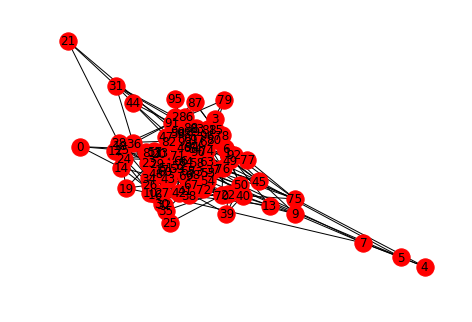

In [24]:
nx.draw(G, with_labels=True, arrows=True)
plt.show()

In [69]:
ne.cost_of_flow(G, {'0':{'99':(0,99)}})

KeyError: 0

In [68]:
ne.cost_of_flow?

In [44]:
ne.bellman_ford(G,0)

({0: None,
  1: 0,
  2: 31,
  3: 20,
  4: 7,
  5: 11,
  6: 10,
  7: 10,
  8: 0,
  9: 20,
  10: 12,
  11: 3,
  12: 8,
  13: 1,
  14: 0,
  15: 91,
  16: 14,
  17: 76,
  18: 91,
  19: 20,
  20: 98,
  21: 56,
  22: 72,
  23: 52,
  24: 12,
  25: 70,
  26: 19,
  27: 65,
  28: 19,
  29: 64,
  30: 98,
  31: 98,
  32: 97,
  33: 41,
  34: 28,
  35: 52,
  36: 16,
  37: 38,
  38: 13,
  39: 41,
  40: 38,
  41: 53,
  42: 59,
  43: 98,
  44: 46,
  45: 5,
  46: 1,
  47: 61,
  48: 99,
  49: 78,
  50: 53,
  51: 98,
  52: 46,
  53: 67,
  54: 88,
  55: 84,
  56: 53,
  57: 46,
  58: 57,
  59: 60,
  60: 13,
  61: 98,
  62: 91,
  63: 72,
  64: 76,
  65: 60,
  66: 98,
  67: 14,
  68: 67,
  69: 8,
  70: 9,
  71: 36,
  72: 53,
  73: 76,
  74: 78,
  75: 63,
  76: 60,
  77: 86,
  78: 76,
  79: 91,
  80: 88,
  81: 74,
  82: 67,
  83: 88,
  84: 12,
  85: 76,
  86: 57,
  87: 92,
  88: 98,
  89: 84,
  90: 99,
  91: 88,
  92: 72,
  93: 38,
  94: 11,
  95: 98,
  96: 99,
  97: 98,
  98: 84,
  99: 93},
 {0: 0,
  1: 0.04,

In [158]:
nodes_temp

[99]

In [168]:
test = enumerate(data)
idx, line = next(test)
nodes_test = [int(re.sub('node', '', n).strip()) for n in re.findall(r'node\d+\s', line)]

In [169]:
nodes_test

[1, 8, 14]

In [88]:
n = 0
current = 'node0'
dest = 'node99'
total_cost = 0
path = [current]
J = []
if current != dest:
    J.append(10000)
while True:
    if current == dest:
        cost = 0
        total_cost += 0
        break
    else:
        keys = [key for key, val in nodes[current]]
        vals = [val for key, val in nodes[current]]
        costs = np.asarray(vals)
        total_cost += costs.min()
        current = keys[costs.argmin()]
        path.append(current)

In [109]:
import networkx as nx

G = nx.DiGraph()
G.add_edge(1,2)
G.add_node(42)


In [130]:

G = nx.DiGraph()
G.add_node(1)
G.add_nodes_from([2,3])
G.add_nodes_from([4])
G.add_edge(1,2)
print(G.nodes())
print(G.edges())

[1, 2, 3, 4]
[(1, 2)]


In [127]:
G?

In [89]:
total_cost, path

(427.10000000000002,
 ['node0',
  'node1',
  'node6',
  'node9',
  'node13',
  'node38',
  'node40',
  'node47',
  'node50',
  'node53',
  'node56',
  'node57',
  'node58',
  'node64',
  'node65',
  'node66',
  'node68',
  'node71',
  'node74',
  'node76',
  'node77',
  'node78',
  'node81',
  'node89',
  'node97',
  'node98',
  'node99'])

In [90]:
%%file solution.txt
node0
node8
node11
node18
node23
node33
node41
node53
node56
node57
node60
node67
node70
node73
node76
node85
node87
node88
node93
node94
node96
node97
node98
node99

Cost:  160.55000000000007

Writing solution.txt


In [94]:
beta, rho, B, M = 0.5, 0.9, 10, 5 
S=range(B+M+1) #Statespace=0,...,B+M
Z = range(B + 1) # Shock space = 0,...,B
def U(c):
    "Utility function."
    return c**beta
def phi(z):
    "Probability mass function , uniform distribution."
    return 1.0 / len(Z) if 0 <= z <= B else 0
def Gamma(x):
    "The correspondence of feasible actions."
    return range(min(x, M) + 1)
def T(v):
    """An implementation of the Bellman operator.
    Parameters: v is a sequence representing a function on S. Returns: Tv, a list."""
    Tv = []
    for x in S:
    # Compute the value of the objective function for each # a in Gamma(x), and store the result in vals
        vals = []
        for a in Gamma(x):
            y = U(x - a) + rho * sum(v[a + z]*phi(z) for z in Z) 
            vals.append(y)
            # Store the maximum reward for this x in the list Tv
            Tv.append(max(vals)) 
    return Tv